<a href="https://colab.research.google.com/github/tashisharma10/Spotify-EDA/blob/main/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
sns.set_style('darkgrid')

In [4]:
df=pd.read_csv('/content/data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


data cleaning

In [5]:
df.isna().sum()

,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [9]:
df.shape

(2017, 16)

In [10]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [11]:
len(df.columns)

16

In [12]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# **TOP 5 POPULAR ARTISTS**

In [21]:

top_five_artists=df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]
top_five_artists

,song_title
artist,
Drake,16
Rick Ross,13
Disclosure,12
Backstreet Boys,10
WALK THE MOON,10


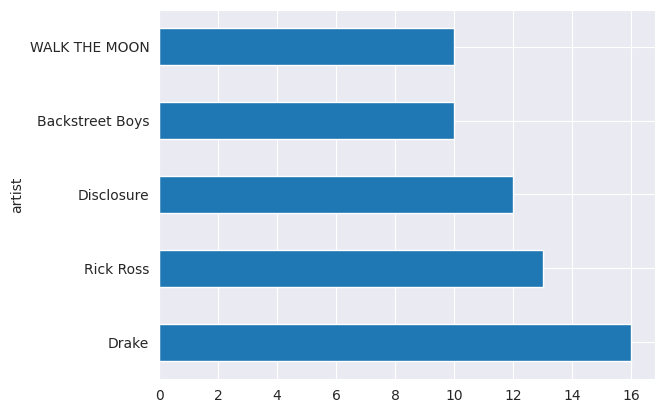

In [14]:
top_five_artists.plot(kind="barh")
plt.show()

# **TOP 5 LOUDEST TRACKS**

In [7]:
top_five_loudest_tracks=df[["loudness","song_title"]].sort_values(by="loudness",ascending=False)[:5]
top_five_loudest_tracks

,loudness,song_title
195,-0.307,GodLovesUgly
636,-0.718,The Lion - Original Mix
1443,-0.787,The Wall
2010,-0.935,Hey Baby - Steve Aoki Remix
1299,-0.994,No Absolution


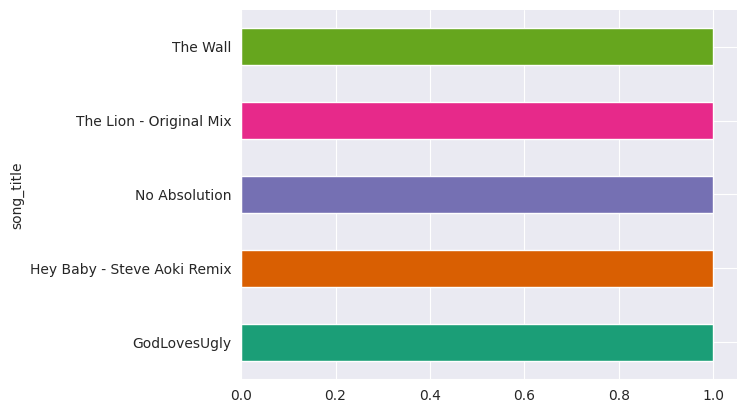

In [8]:

top_five_loudest_tracks.groupby('song_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

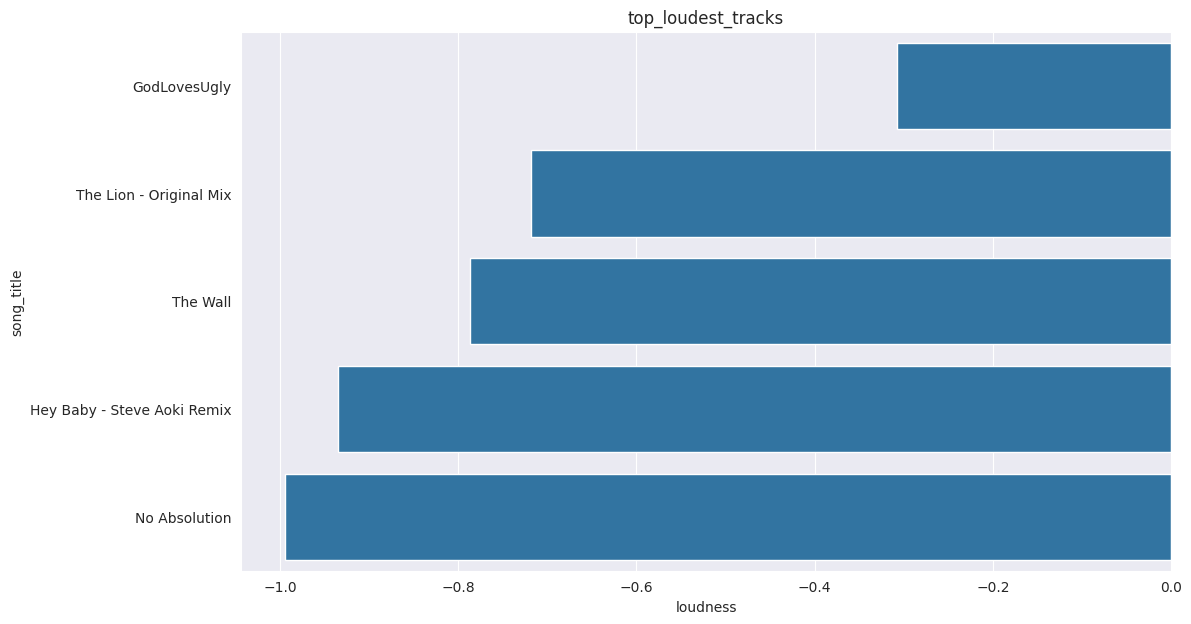

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness",y="song_title",data=top_five_loudest_tracks)
plt.title("top_loudest_tracks")
plt.show()


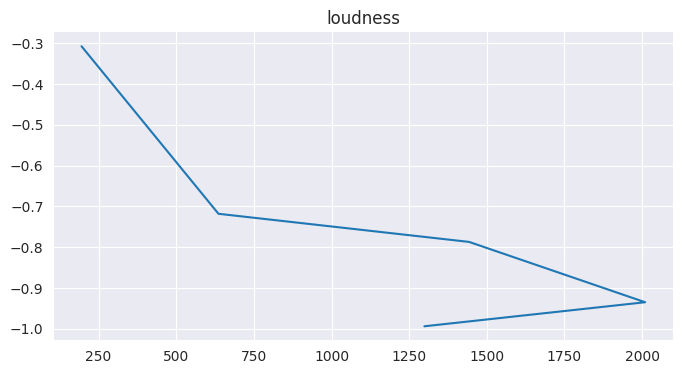

In [9]:

top_five_loudest_tracks['loudness'].plot(kind='line', figsize=(8, 4), title='loudness')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Artist with most dancebility song**

In [12]:
top_five_artists_danceable_songs=df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


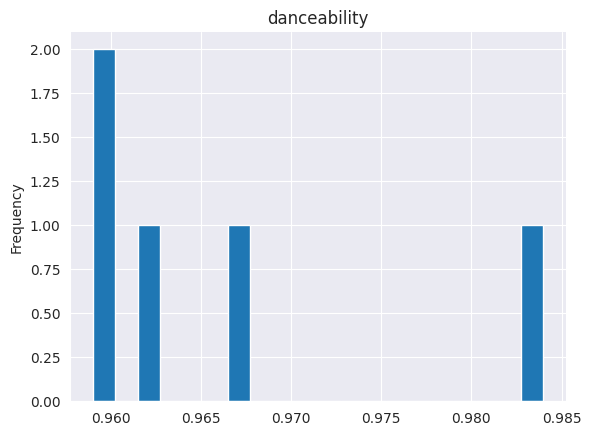

In [13]:

top_five_artists_danceable_songs['danceability'].plot(kind='hist', bins=20, title='danceability')
plt.gca().spines[['top', 'right',]].set_visible(False)

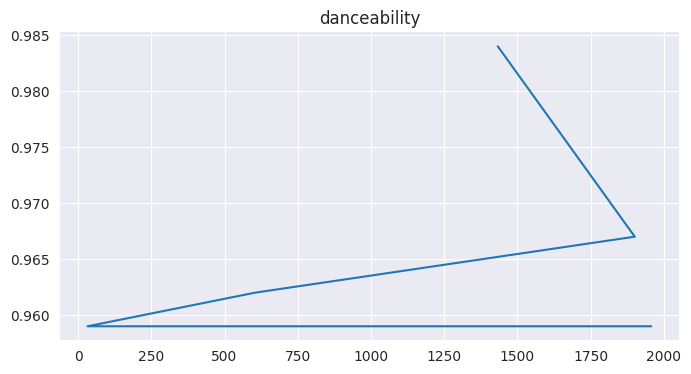

In [28]:

top_five_artists_danceable_songs['danceability'].plot(kind='line', figsize=(8, 4), title='danceability')
plt.gca().spines[['top', 'right']].set_visible(False)

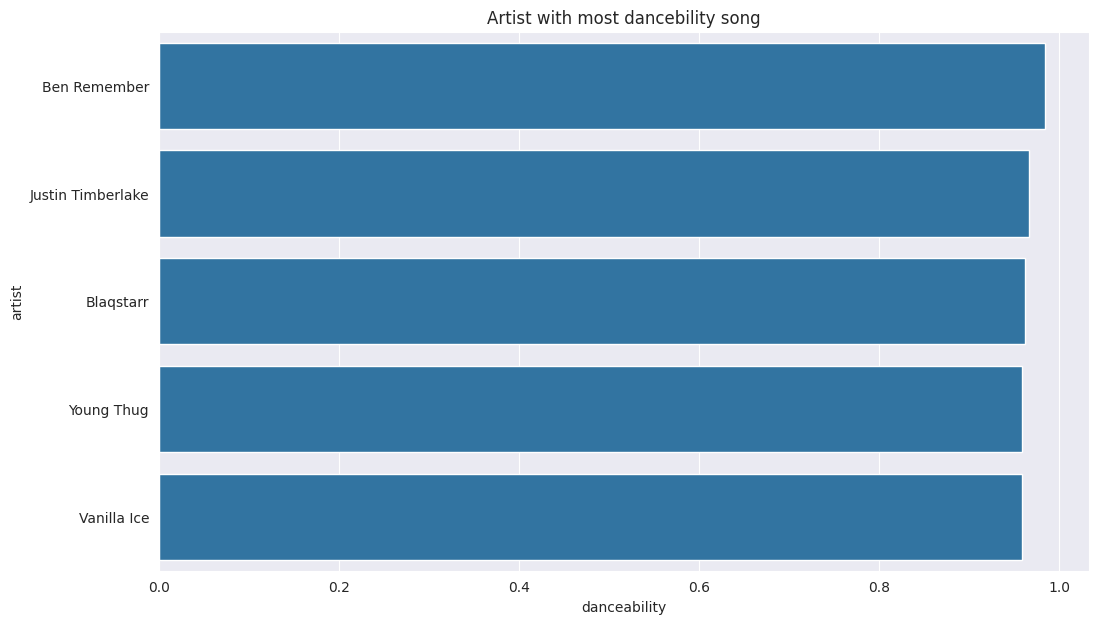

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability",y="artist",data=top_five_artists_danceable_songs)
plt.title("Artist with most dancebility song")
plt.show()

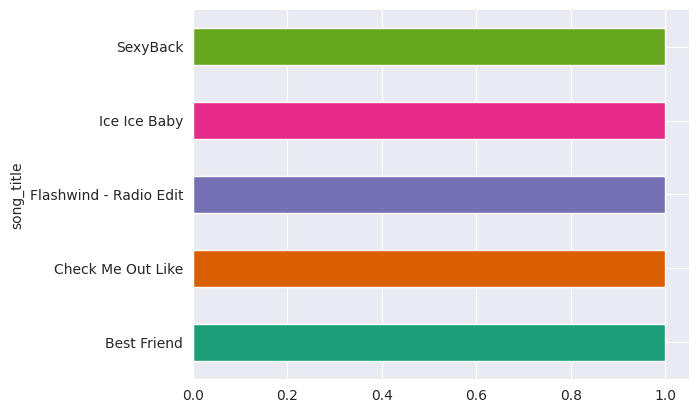

In [14]:

top_five_artists_danceable_songs.groupby('song_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

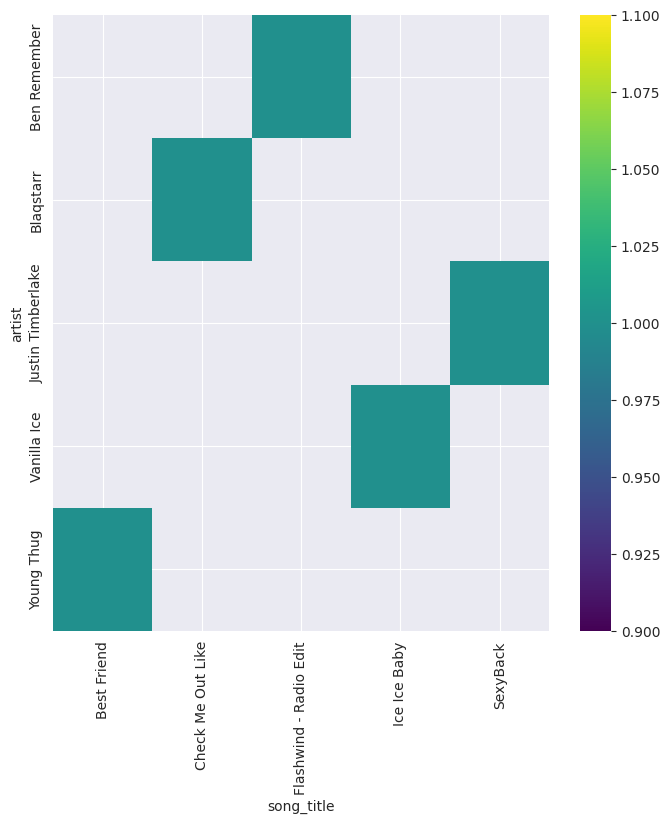

In [15]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['artist'].value_counts()
    for x_label, grp in top_five_artists_danceable_songs.groupby('song_title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('song_title')
_ = plt.ylabel('artist')

# **TOP 10 INSTRUMENTAL TRACKS**

In [16]:
top_10_instrumental_tracks=df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:10]
top_10_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


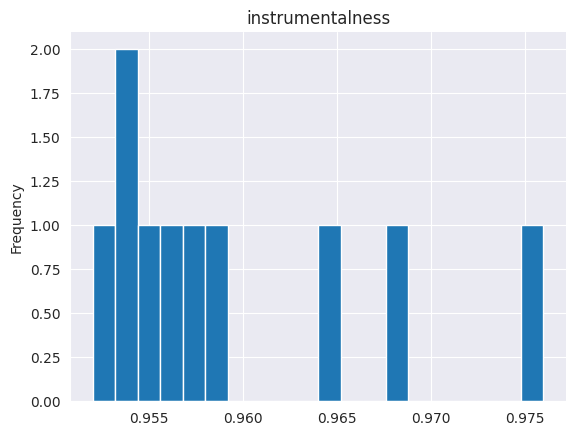

In [17]:

top_10_instrumental_tracks['instrumentalness'].plot(kind='hist', bins=20, title='instrumentalness')
plt.gca().spines[['top', 'right',]].set_visible(False)

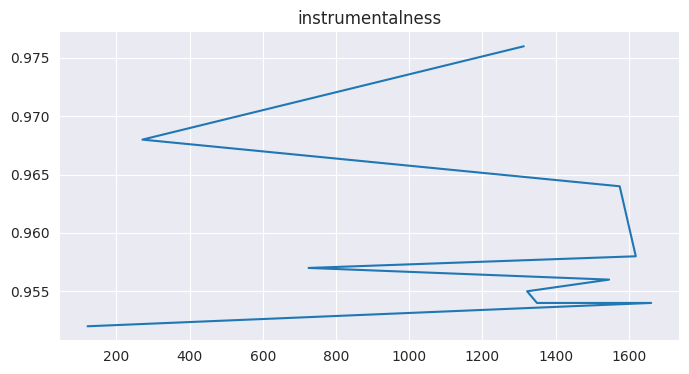

In [18]:

top_10_instrumental_tracks['instrumentalness'].plot(kind='line', figsize=(8, 4), title='instrumentalness')
plt.gca().spines[['top', 'right']].set_visible(False)

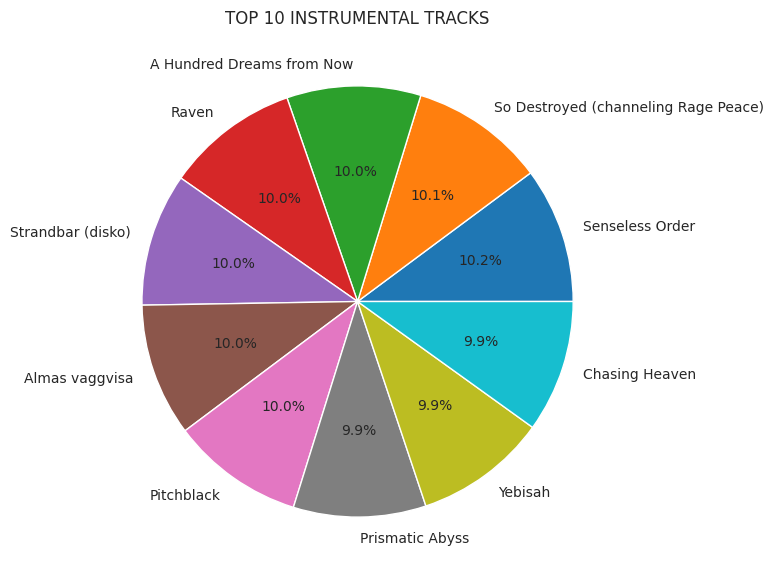

In [38]:
plt.figure(figsize=(12,7))
plt.pie(top_10_instrumental_tracks['instrumentalness'],labels=top_10_instrumental_tracks['song_title'],autopct='%1.1f%%')
plt.title("TOP 10 INSTRUMENTAL TRACKS")
plt.show()

# **MULTIPLE FEATURE PLOTS**

In [39]:
interest_feature_cols=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

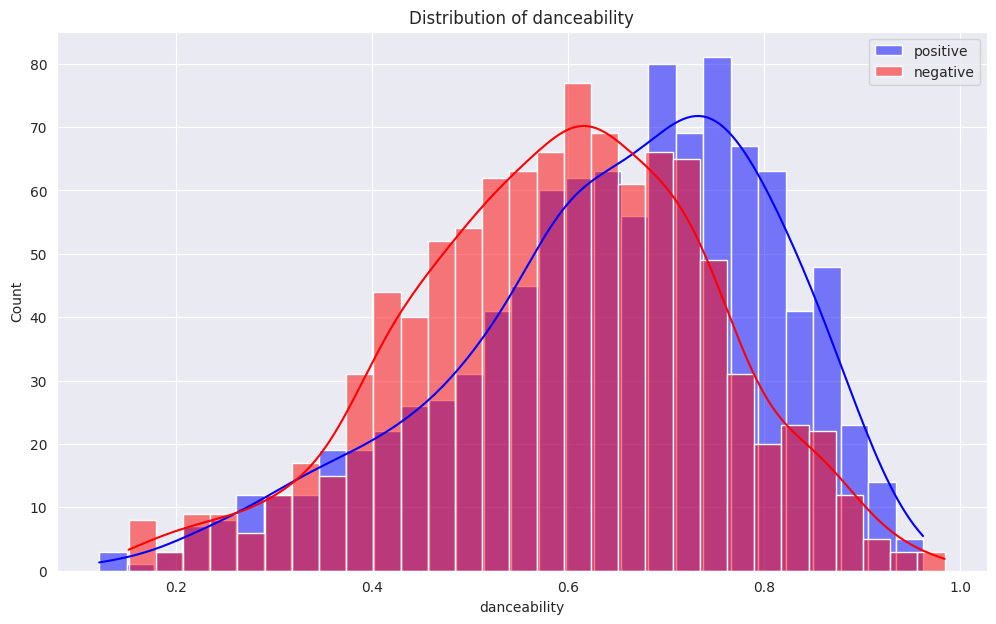

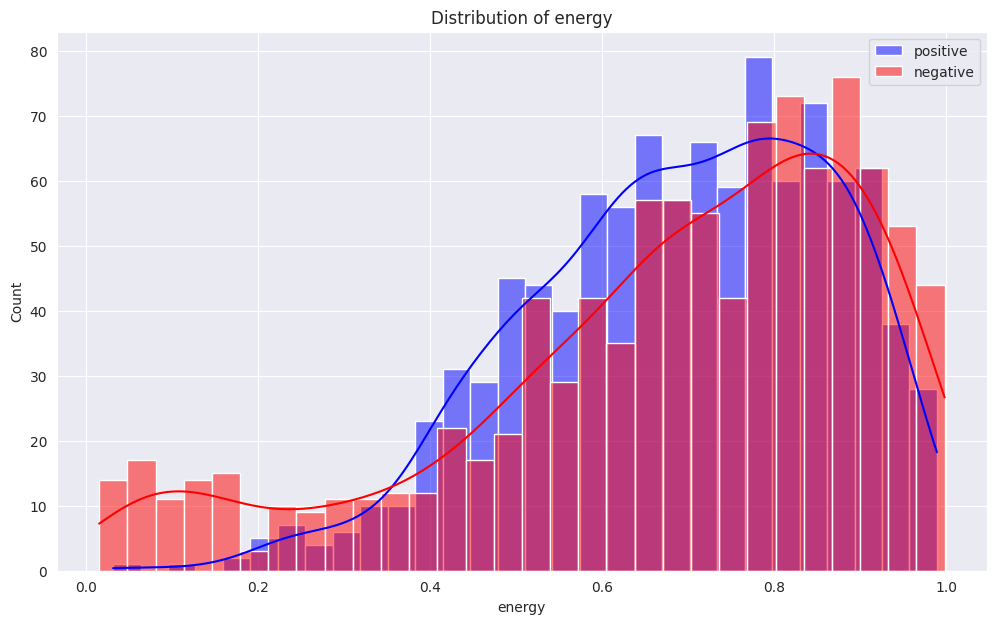

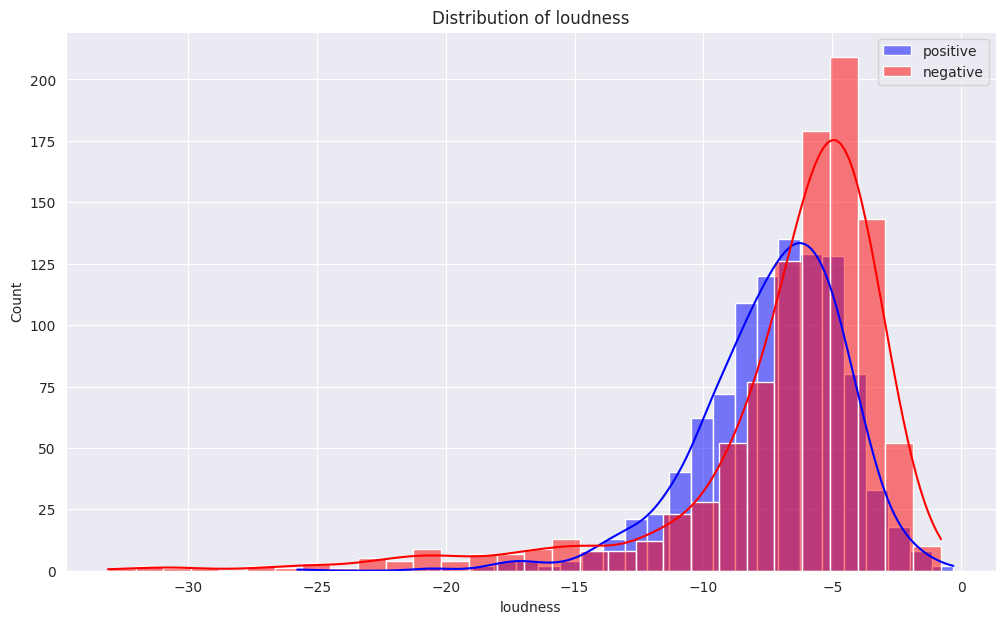

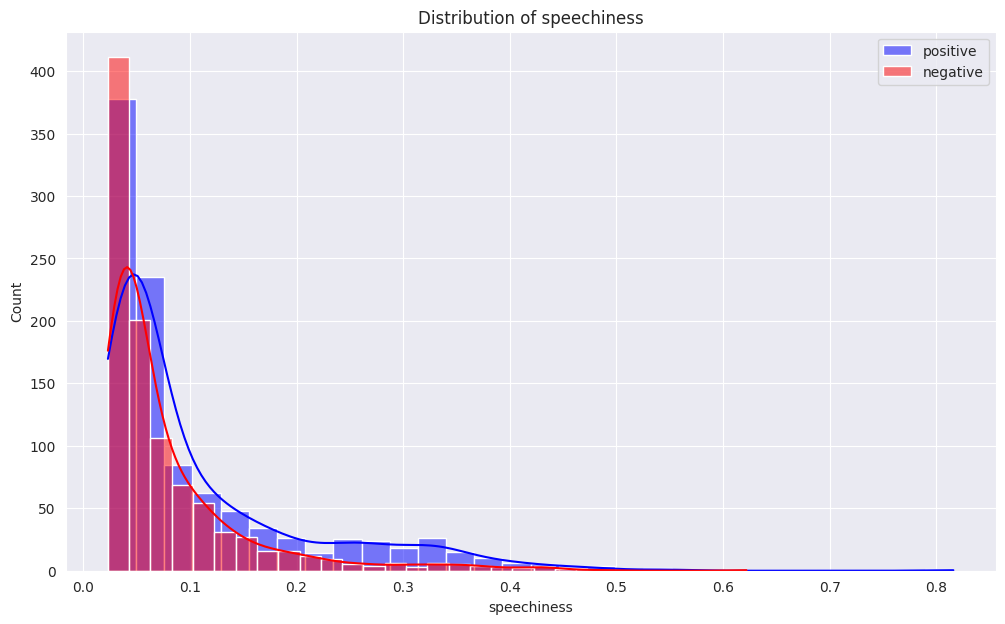

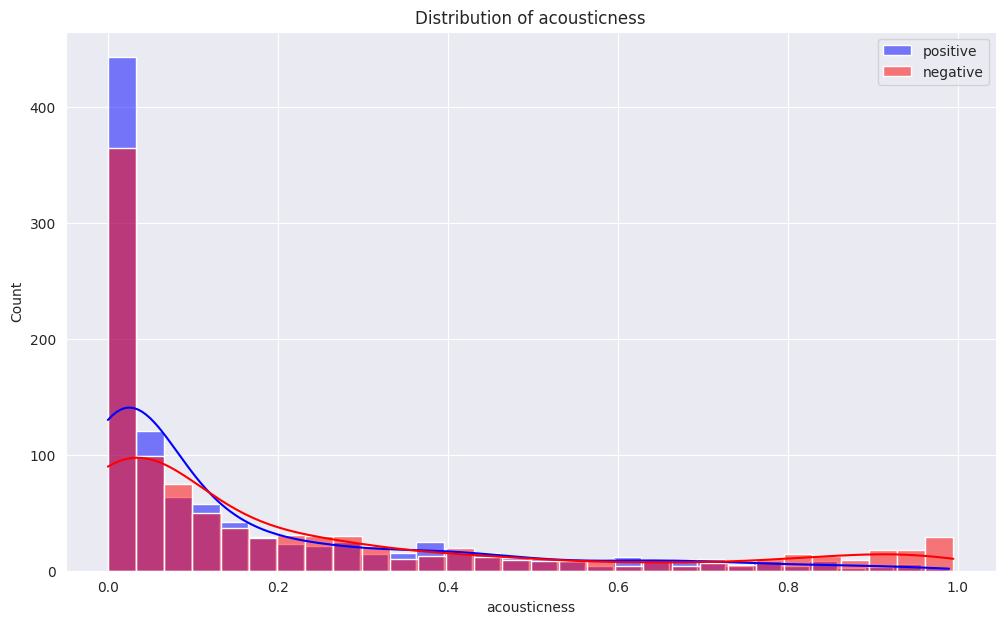

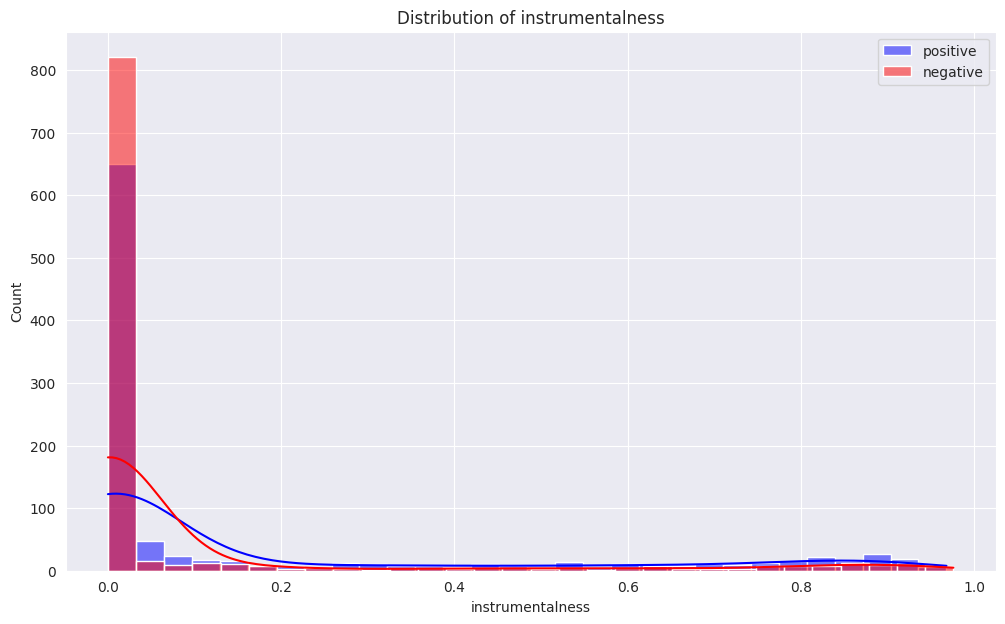

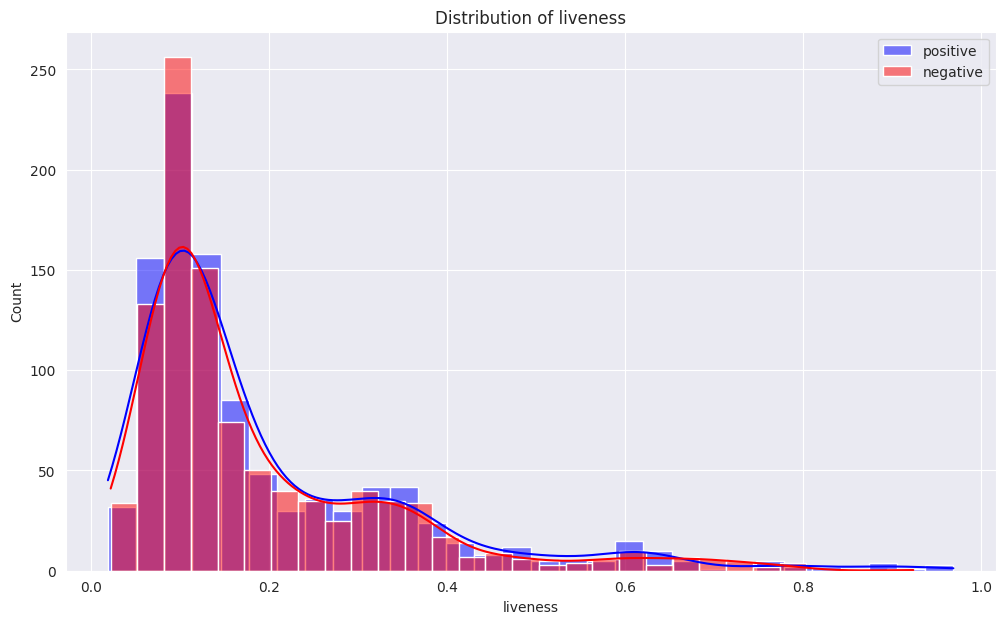

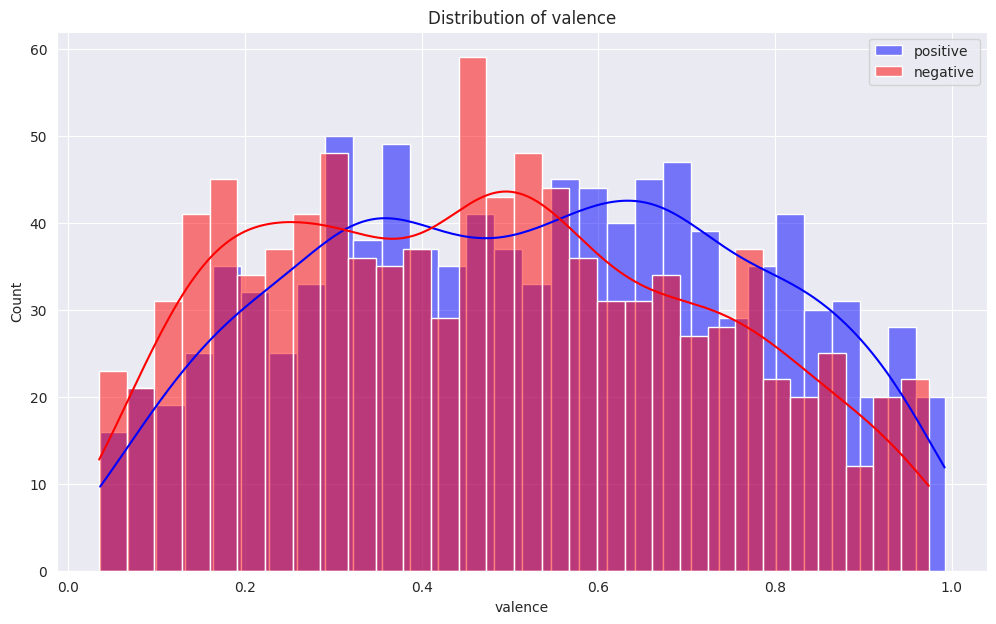

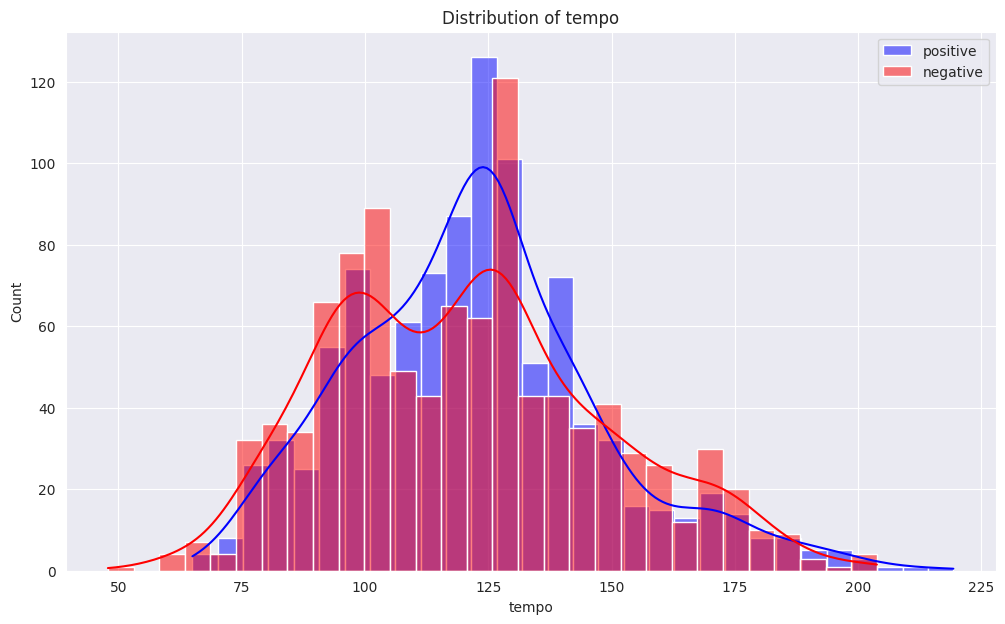

In [45]:
for feature_col in interest_feature_cols:
  pos_data=df[df["target"]==1][feature_col]
  neg_data=df[df["target"]==0][feature_col]
  plt.figure(figsize=(12,7))
  sns.histplot(pos_data,bins=30,label="positive",color="blue",kde=True)
  sns.histplot(neg_data,bins=30,label="negative",color="red",kde=True)
  plt.legend(loc="upper right")
  plt.title(f"Distribution of {feature_col}")
  plt.show()

# **TOP 10 ENERGETIC TRACKS**

In [19]:
top_10_energetic_tracks=df[["energy","song_title","artist"]].sort_values(by="energy",ascending=False)[:10]
top_10_energetic_tracks

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


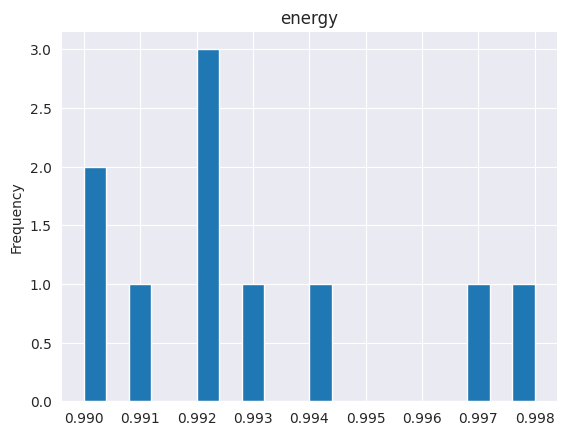

In [20]:

top_10_energetic_tracks['energy'].plot(kind='hist', bins=20, title='energy')
plt.gca().spines[['top', 'right',]].set_visible(False)

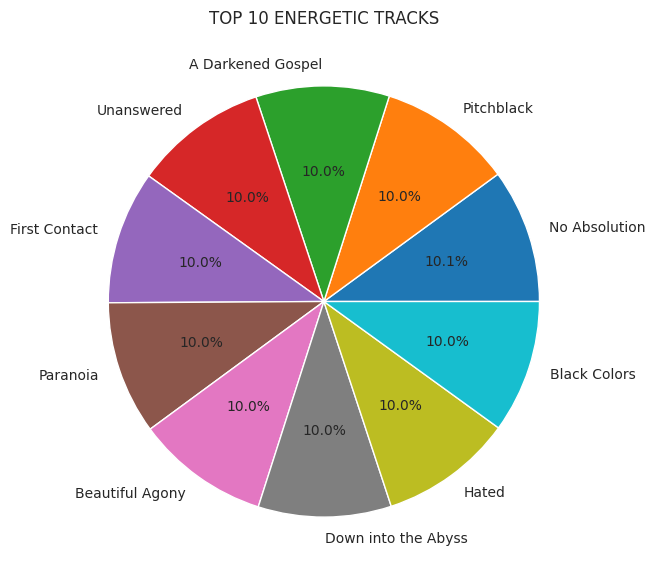

In [50]:
plt.figure(figsize=(12,7))
plt.pie(top_10_energetic_tracks['energy'],labels=top_10_energetic_tracks['song_title'],autopct='%1.1f%%')
plt.title("TOP 10 ENERGETIC TRACKS")
plt.show()

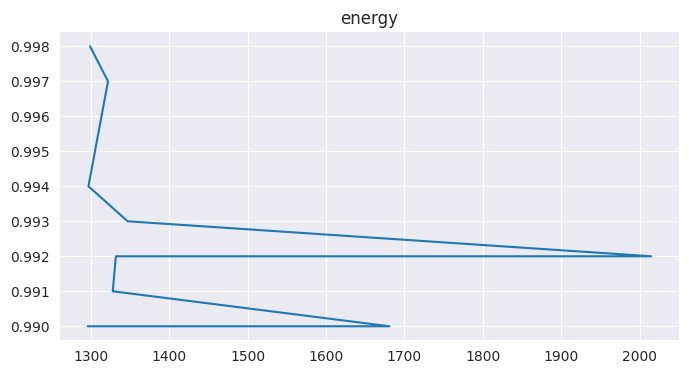

In [21]:

top_10_energetic_tracks['energy'].plot(kind='line', figsize=(8, 4), title='energy')
plt.gca().spines[['top', 'right']].set_visible(False)

# **MOST TRENDING GENRE**

In [68]:

most_trending_genre = df[["valence","song_title","artist"]].sort_values(by="valence", ascending=False)
most_trending_genre = most_trending_genre.head(1)
most_trending_genre

,valence,song_title,artist
460,0.992,Abataka - Original Mix,Ida Engberg


# **TOP 10 TRACKS WITH MOST VALENCE**

In [76]:
top_10_tracks_with_most_valence= df[["valence","song_title","artist"]].sort_values(by="valence", ascending=False)[:10]
top_10_tracks_with_most_valence

,valence,song_title,artist
460,0.992,Abataka - Original Mix,Ida Engberg
912,0.975,I'm Walkin' - 2002 Digital Remaster,Fats Domino
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)",Polina
207,0.973,Look at You,George McCrae
48,0.973,Azon de ma gnin kpevi,T. P. Orchestre Poly-Rythmo
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
1590,0.972,Jelly On A Plate,The Kids Band
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
497,0.968,Mi Swing es Tropical,Nickodemus
112,0.967,Please Mr. Postman,The Marvelettes


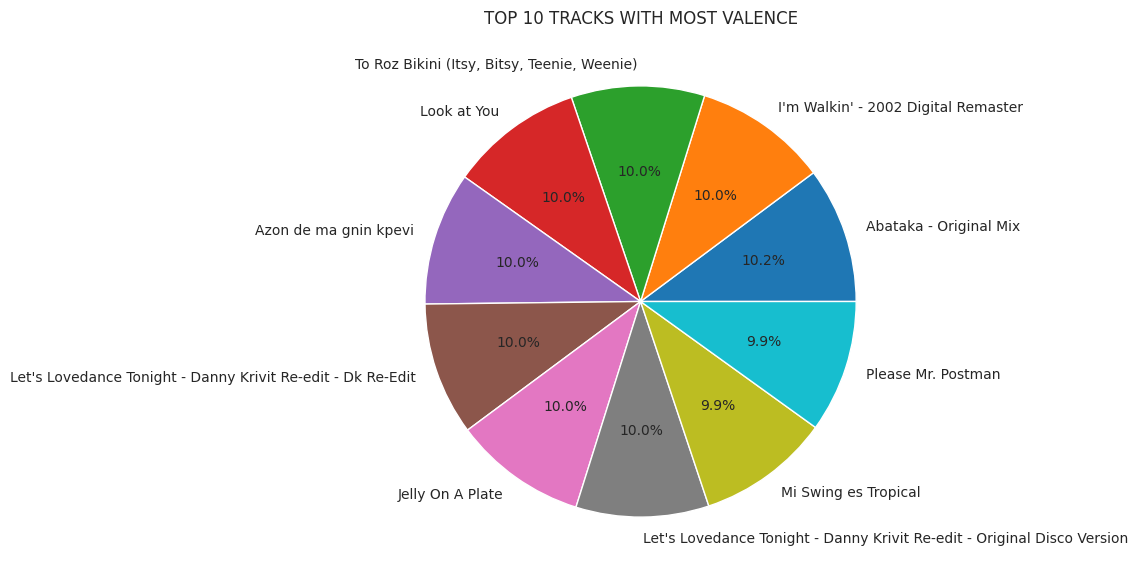

In [72]:
plt.figure(figsize=(12,7))
plt.pie(top_10_tracks_with_most_valence['valence'],labels=top_10_tracks_with_most_valence['song_title'],autopct='%1.1f%%')
plt.title("TOP 10 TRACKS WITH MOST VALENCE")
plt.show()

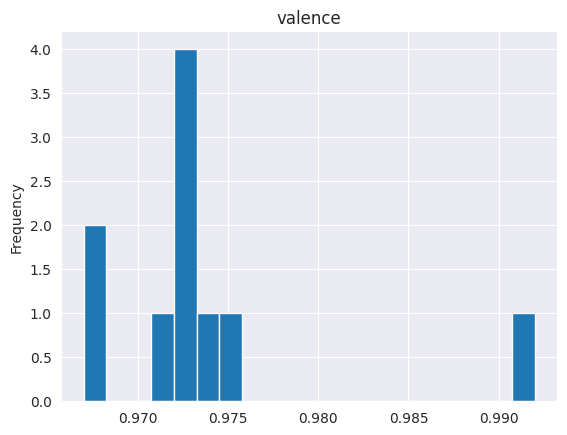

In [75]:

top_10_tracks_with_most_valence['valence'].plot(kind='hist', bins=20, title='valence')
plt.gca().spines[['top', 'right',]].set_visible(False)

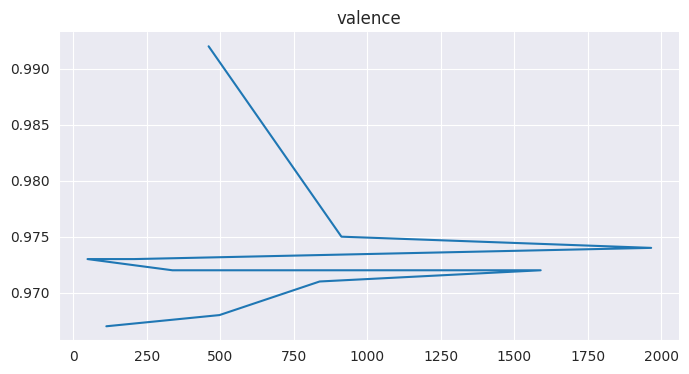

In [74]:

top_10_tracks_with_most_valence['valence'].plot(kind='line', figsize=(8, 4), title='valence')
plt.gca().spines[['top', 'right']].set_visible(False)

# **MOST COMMON DURATIONS**

In [22]:
most_common_durations= df[["duration_ms","song_title","artist"]].sort_values(by="duration_ms", ascending=False)[:5]
most_common_durations

,duration_ms,song_title,artist
1535,1004627,The Nearness of You,Joshua Redman
695,849960,Music Is the Answer - Original Extended 12-Inc...,Celeda
819,825027,Southern Man - Live,"Crosby, Stills, Nash & Young"
1603,784013,Viola Sonata in C Minor: III. Andante con vari...,Felix Mendelssohn
1565,763467,Gloomy Sunday,Branford Marsalis


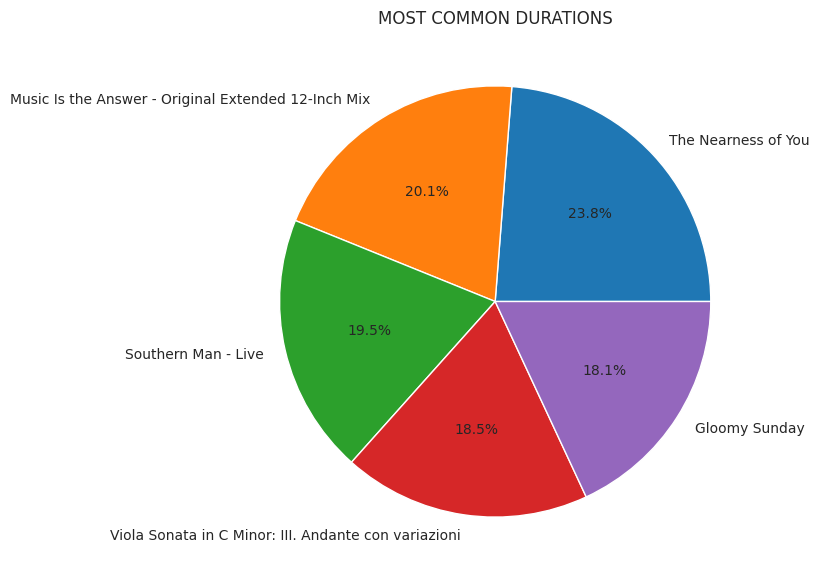

In [84]:
plt.figure(figsize=(12,7))
plt.pie(most_common_durations['duration_ms'],labels=most_common_durations['song_title'],autopct='%1.1f%%')
plt.title("MOST COMMON DURATIONS")
plt.show()

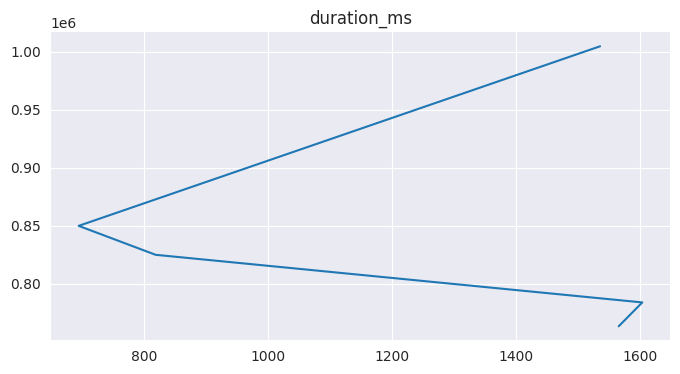

In [23]:

most_common_durations['duration_ms'].plot(kind='line', figsize=(8, 4), title='duration_ms')
plt.gca().spines[['top', 'right']].set_visible(False)

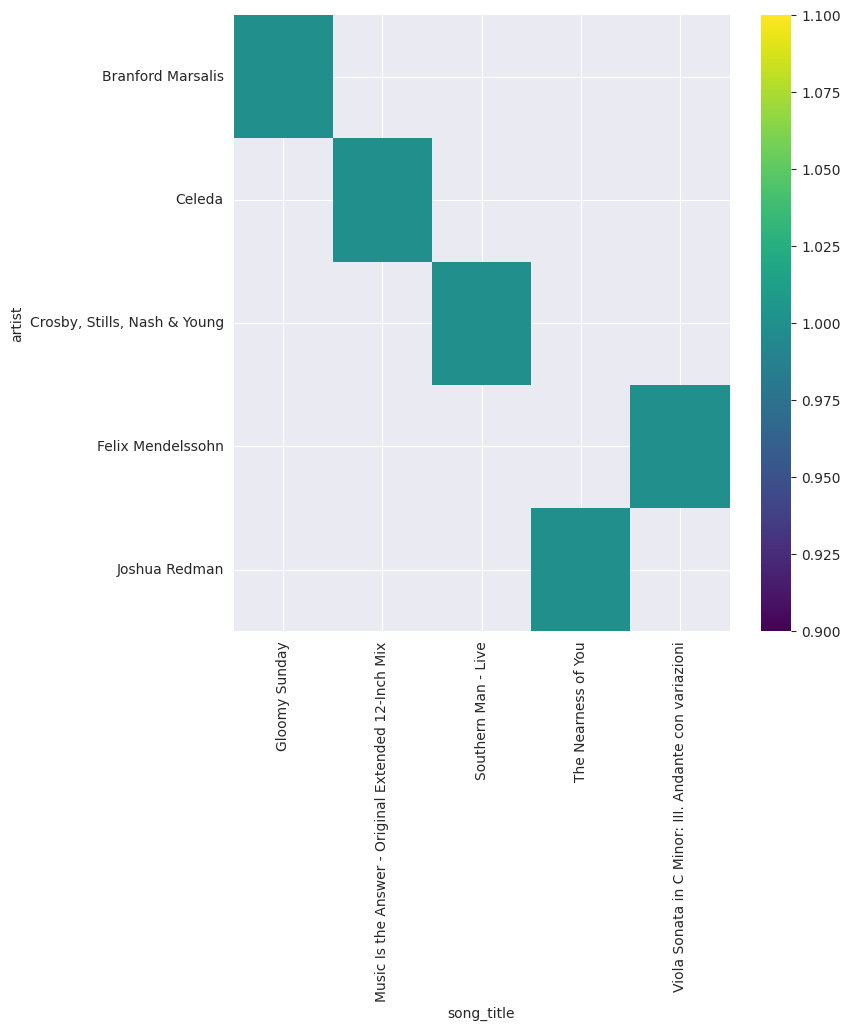

In [24]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['artist'].value_counts()
    for x_label, grp in most_common_durations.groupby('song_title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('song_title')
_ = plt.ylabel('artist')